## Apunte sobre divisor de tensión

### Derivación

Tenemos 1 fuente de tensión $V_0$ que alimenta 2 resistencias en serie $R'$ y $R$:

![div](images/divisor.jpg)

Queremos estudiar la caida de tensión sobre la resistencia $R$:
$$
V = I R
$$
La corriente que circula sobre las 2 resistencias es la misma:
$$
I = \frac{V_0}{(R' + R)}
$$
Reemplazando la segunda en la primera ecuación, nos queda la tensión que cae sobre la resistencia $R$:
$$
V = V_0 \frac{R}{R' + R}
$$
Note que la tensión de entrada se *divide* por un factor $\frac{R}{R' + R}$.

-Si $R' = 0$, entonces $V=V_0$ la tensión de entrada cae completamente sobre $R$.

-Si $R' \to \infty$, entonces $V=0$ la tensión de entrada cae completamente sobre $R'$.


### ¿Qué valores debo darle a las resistencias para medir correctamente?

Queremos ver que valores de resistencias me conviene poner para producir cambios de caidas de tensión que sean bien resueltos por nuestro instrumental.

En primer lugar vamos a expresar a la resistencia $R'$ como un factor de $R$:
$$R' = x R$$
Y a la tensión $V$ como a un factor de $V_0$:
$$V=y V_0$$
Luego obtengo una relación entre los factores:
$$
y V_0 = V_0\frac{R}{xR+R}
$$
$$
y = \frac{1}{1+x}
$$

Un gráfico **x vs y** nos da una idea de como cambia la tensión $V$ a medida que cambiamos $R'$ respecto de R:

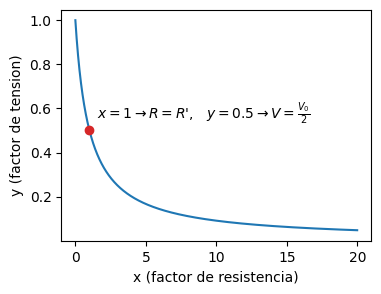

In [57]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0.0,20,0.01)
y = 1/(1+x)

fig,ax = plt.subplots(figsize=(4,3))
ax.plot(x,y)
ax.scatter([1],[0.5],c='C3', zorder=2)
ax.annotate( r"$x=1 \to R=R$'" + ",   $y=0.5$" + r"$\to V=\frac{V_0}{2}$",(1.5,0.55) )
ax.set_ylabel("y (factor de tension)")
ax.set_xlabel("x (factor de resistencia)")
plt.show()


En el caso indicado en el gráfico muestra que cuando las resistencias son iguales la tensión $V$ cae a la mitad de la tensión de la fuente.

Vemos entonces que hay un rango de valores de **x** donde **y** cambia significativa. Esto implica que hay un rango de valores de **R'** donde la tensión en **V** cambia significativamente. Así mismo, a partir de un dado valor de resistencia, el cambio que se produce en el voltaje es infimo, de modo que no será aconsejable tomar mediciones en ese rango por que lo que se mida puede caeer dentro del error de medición del instrumento.

**Rango de sensibilidad**

La sensibilidad del divisor de tensión a cambios en la resistencia $R'$ se puede analizar considerando la derivada de la función

$$\frac{dy}{dx} = \frac{-1}{(1+x)²}$$

Vamos a pedir que el cambio en resistencia produzca un cambio significativo en la caída de la tensión:

$$\frac{1}{(1+x)²}>\alpha$$

Si $\alpha=0.1$, luego:

$$0<x<2$$

En términos de la resistencia $R'$:

$$0<R'<2R$$

En ese rango produciremos cambios $\Delta V$ mayores al $10\%$ t¡y será acosenjable medir.


### Caso ejemplo:

Tenemos un circuito alimentado con una fuente de tensión $V_0=5V$. Con una resistencia de carga de $R= 1 k\Omega$ y un potenciometro $R'$ que puede variar desde $R'=0$ hasta $R'=2 k\Omega$.

Cuando $R'\sim 0$ obtenemos los siguiente valores:

![i1](images/dt1.png)

Cuando $R'\sim 2R$ obtenemos los siguiente valores:

![i2](images/dt2.png)



Podemos ver que el rango de tensiones $V$ accesibles es $(1.68V, 4.9V)$.

Así mismo, el rango de corrientes accesibles es $I$ es $(1.68mA, 4.9mA)$.

Si estamos usando resistencias de carbon que admite una potencia máxima de $P=0.25W$, la corriente de limitación será: 

$$ I_{Max}= \sqrt{P/R} = \sqrt{0.25/1000} = 15.8 mA$$

Vemos que es bastante mayor a nuestro rango de corrientes de trabajo, esto nos asegura una medición dentro de los rangos de seguridad.




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


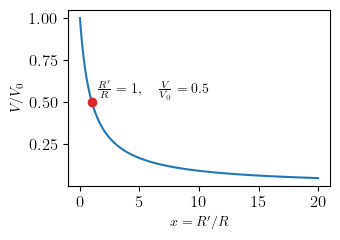

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import plotter_lib as pl

x= np.arange(0.0,20,0.01)
y = 1/(1+x)

plot = pl.Plotter(W=3.5,H=2.5)
plot.ax.plot(x,y)
plot.ax.scatter([1],[0.5],c='C3', zorder=2)
plot.ax.annotate( r"$\frac{R^\prime}{R} = 1, \quad \frac{V}{V_0} = 0.5$",(1.5,0.55) )
plot.ax.set_ylabel("$V/V_0$")
plot.ax.set_xlabel("$x = R'/R$")
plot.show("images/v_x.png")

### graficos de las potencias

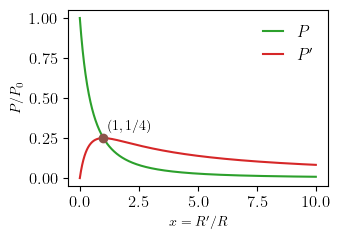

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import plotter_lib as pl

x= np.arange(0.0,10,0.01)
y = 1/(1+x)**2
y2 = x/(1+x)**2

plot = pl.Plotter(H=2.5,W=3.5)

plot.ax.plot(x,y, c="C2", label='$P$')
plot.ax.plot(x,y2, c="C3", label="$P^\prime$")
plot.ax.scatter([1],[0.25], zorder=3, c="C5")
ann = "$(1, 1/4)$"
plot.ax.annotate( ann,(1.2,0.3) )
plot.ax.set_ylabel("$P/P_0$")
plot.ax.set_xlabel("$x=R'/R$")
plot.show("potencias.png")

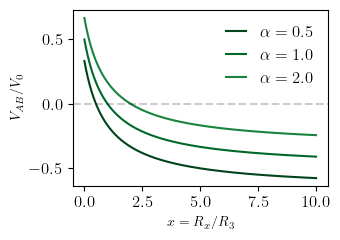

In [ ]:
cmap = plt.colormaps['Greens'].reversed() # Cambia 'viridis' por otra paleta
colors = cmap(np.linspace(0, 1, 10))  # Obtiene 10 colores de la paleta


x= np.arange(0.0,10,0.01)
f = lambda u,a : a/(1+a) - u/(1+u)


plot = pl.Plotter(H=2.5,W=3.5)

i=0

for a in [0.5,1,2]:
    plot.ax.plot(x,f(x,a), c=colors[i], label=r'$\alpha=%.1f$'%a)

    i+=1

plot.ax.axhline( 0, linestyle='--',c='black', alpha=0.2 )

plot.ax.set_ylabel( "$V_{AB}/V_0$" )
plot.ax.set_xlabel( "$x = R_x/R_3$" )

plot.show("Vab_puenteW.png")